<a href="https://colab.research.google.com/github/muhsupriazis/final-project/blob/main/clustering%20data%20days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Upload file Excel
from google.colab import files
uploaded = files.upload()

# Baca file Excel
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)


Saving Database.xlsx to Database.xlsx


In [3]:
# Menyiapkan DataFrame kosong untuk pivot tabel akhir
days_of_week = df['day'].unique()
hours_of_day = df['hour'].unique()
num_weeks = df['week'].nunique()

# Create a list to hold the pivot table data
pivot_data = []

# Iterate over each location and day
for location in df['longitude_latitude'].unique():
    for day in days_of_week:
        # Filter data for the current location and day
        filtered_data = df[(df['longitude_latitude'] == location) & (df['day'] == day)]

        # Initialize list to hold traffic values for each week
        traffic_values = []

        for week in range(1, num_weeks + 1):
            # Filter data for the current week
            week_data = filtered_data[filtered_data['week'] == week]

            # Append traffic values for each hour of the day
            for hour in sorted(hours_of_day):
                hour_data = week_data[week_data['hour'] == hour]
                if not hour_data.empty:
                    traffic_values.append(hour_data['traffic'].values[0])
                else:
                    traffic_values.append(0)  # Add 0 if no data for this hour

        # Add data for the current location and day
        pivot_data.append([location, day] + traffic_values)

# Define column names
traffic_columns = [f'traffic_{i+1}' for i in range(num_weeks * len(hours_of_day))]
columns = ['longitude_latitude', 'day'] + traffic_columns

# Create DataFrame from pivot data
pivot_df = pd.DataFrame(pivot_data, columns=columns)


In [4]:
# Simpan pivot table ke file Excel
output_file = '/content/pivot_table_days.xlsx'
pivot_df.to_excel(output_file, index=False)

# Download file
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [6]:
# Load the pivot table data
file_name = '/content/pivot_table_days.xlsx'  # Ganti dengan nama file yang sesuai
pivot_df_day = pd.read_excel(file_name)


In [7]:
# Menyiapkan data untuk klasterisasi
# Mengambil kolom numeric untuk klasterisasi (misalnya traffic1, traffic2, dst.)
data_day = pivot_df_day.drop(columns=['longitude_latitude', 'day'])  # Drop non-numeric columns

# Normalisasi data
scaler = StandardScaler()
data_normalized_day = scaler.fit_transform(data_day)


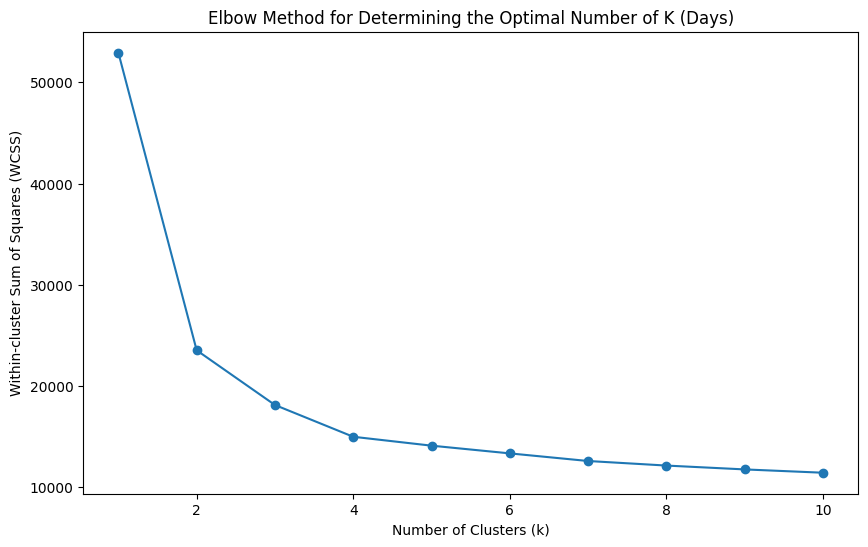

In [8]:
# Menentukan jumlah klaster yang optimal menggunakan metode elbow
wcss_day = []
for i in range(1, 11):  # Coba 1 sampai 10 klaster
    kmeans_day = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_day.fit(data_normalized_day)
    wcss_day.append(kmeans_day.inertia_)

# Plot hasil metode elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_day, marker='o')
plt.title('Elbow Method for Determining the Optimal Number of K (Days)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.show()


In [13]:
# Klasterisasi menggunakan K-Means dengan k yang optimal
k_day = 2  # Misalnya k yang optimal setelah metode elbow
kmeans_day = KMeans(n_clusters=k_day, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_day = kmeans_day.fit_predict(data_normalized_day)

# Menambahkan hasil klasterisasi ke DataFrame
pivot_df['Cluster'] = clusters_day


In [14]:
# Simpan pivot table ke file Excel
output_file = '/content/table_cluster_days.xlsx'
pivot_df.to_excel(output_file, index=False)

# Download file
files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

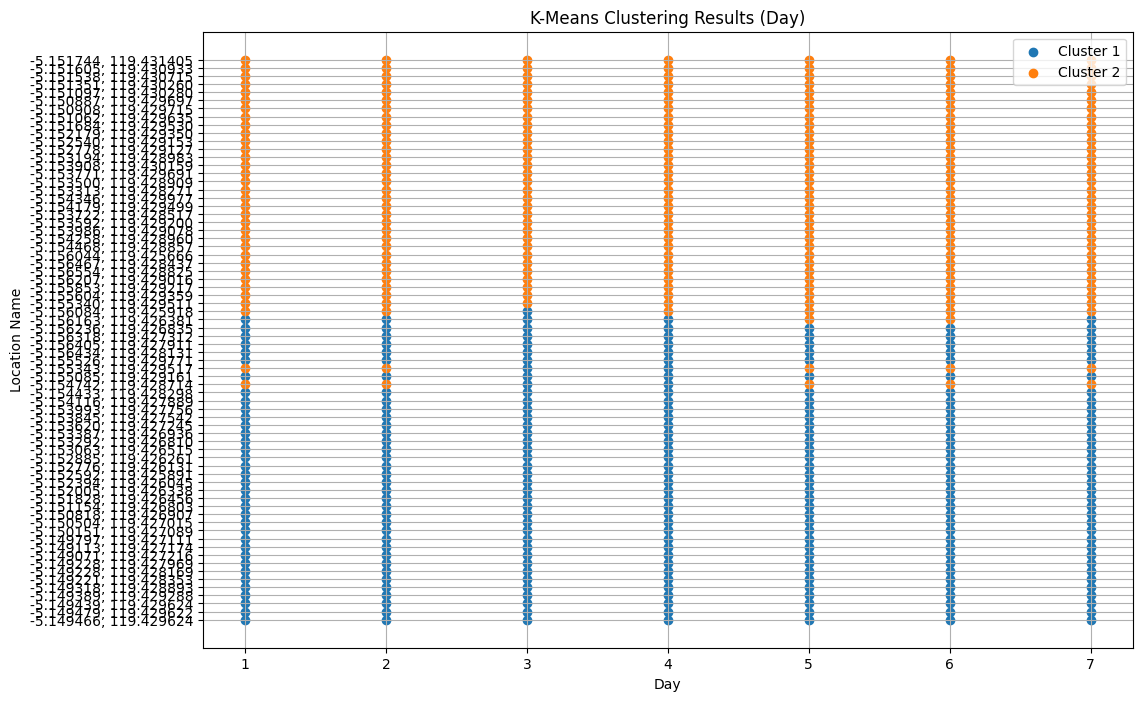

In [15]:
# Plot hasil klasterisasi
plt.figure(figsize=(12, 8))

# Warna berbeda untuk setiap klaster
for i in range(k_day):
    cluster_data_day = pivot_df[pivot_df['Cluster'] == i]
    plt.scatter(cluster_data_day['day'], cluster_data_day['longitude_latitude'], label=f'Cluster {i+1}')

plt.title('K-Means Clustering Results (Day)')
plt.xlabel('Day')
plt.ylabel('Location Name')
plt.legend()
plt.grid(True)
plt.show()
